G1  X7.9627500000000  Y7.9627500000000  Z     2.654250  F120.0000000000000
M106S255
G1  X12.5414444444444  Y10.6170000000000  Z1.0000000000000  F300.0000000000000
G1  X12.5302232365398  Y10.8089626260645  Z1.0030049491388  F300.0000000000000
G1  X12.4892765498395  Y10.9965292459000  Z1.0069474281481  F300.0000000000000
G1  X12.4197711519113  Y11.1746624670367  Z1.0118893808039  F300.0000000000000
G1  X12.3237351848770  Y11.3385960623478  Z1.0179343952359  F300.0000000000000
G1  X12.2039992989284  Y11.4839816683850  Z1.0252273862378  F300.0000000000000
G1  X12.0641129590829  Y11.6070232411369  Z1.0339523930047  F300.0000000000000
G1  X11.9082383959168  Y11.7045950972885  Z1.0443266060655  F300.0000000000000
G1  X11.7410253666373  Y11.7743398565925  Z1.0565881517508  F300.0000000000000
G1  X11.5674704939491  Y11.8147432034891  Z1.0709747974008  F300.0000000000000
G1  X11.3927654379333  Y11.8251830855576  Z1.0876909291692  F300.0000000000000
G1  X11.2221385151654  Y11.8059517416443  Z1.10

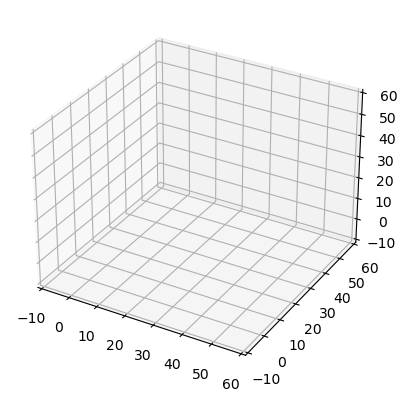

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
from mpl_toolkits.mplot3d import Axes3D

box_x = [0, 50, 50, 0, 0]
box_y = [0, 0, 60, 60, 0]
box_z = [0, 0, 60, 60, 0]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-10, 60])
ax.set_ylim([-10, 60])
ax.set_zlim([-10, 60])

offset = 10.617
operations = 0
total_length = 0

def plot_dots_in_box(dot_coordinates):
    for x, y, z in dot_coordinates:
        plt.plot(x, y, z, 'bo', markersize = 10)
def plot_dots_in_box_interweaved(dot_coordinates):
    for x, y, z in dot_coordinates:
        plt.plot(x, y, z, 'ro', markersize = 10)

def skein(x_coord, y_coord, z_coord):
    # Parameters for the path calculation
    step = 0.1  # resolution, time step period for each xyz calculation
    k = 4
    dp = 0.08  # change to modify ER, minimum distance between fibers, center to center
    h = 0.3  # height of each layer
    c1 = 2  # standard deviation coefficient
    H = 8  # total height of the skein


    p = dp / (np.pi)
    period = (H - h) / p
    n = (k - 1) / k

    t = np.arange(0, period + step, step)

    t1 = period * np.array([0, 1/5, 2/5, 3/5, 4/5, 1])
    r1 = H * np.array([0.25, 0.4, 0.55, 0.4, 0.36, 0.25])
    pol = np.polyfit(t1, r1, 3)

    a = np.polyval(pol, t)
    c = a / c1

    theta = t
    rho = a * np.cos(n * t)

    z = h * (np.exp(- (rho**2 / (2 * c**2))))
    z = z - z[0]
    dz = p * theta
    z = z + dz
    x, y = rho * np.cos(theta), rho * np.sin(theta)

    #s = np.sum(np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2))
    #er = s / H
    #print(f"Effective radius (ER): {er}")

    speed = 5 * 60  # mm/min

    motion = np.column_stack((x, y, z))
    motion[:, 0] += x_coord
    motion[:, 1] += y_coord
    motion[:, 2] += z_coord

    skeingcode = ""
    for i in range(len(motion)):
        x_str = f"X{motion[i, 0]:2.13f}"
        y_str = f"Y{motion[i, 1]:2.13f}"
        z_str = f"Z{motion[i, 2]:2.13f}"
        f_str = f"F{speed:2.13f}"
        skeingcode += f"G1  {x_str}  {y_str}  {z_str}  {f_str}\n"
    print(skeingcode)

HeightLayers = 4
HorizontalIterations = 1
VerticalIterations = 1

#Skein Code
for z in range(1,HeightLayers):
    for h in range(HorizontalIterations):
        if z % 2 ==0:
            for v in range(VerticalIterations):
                operations += 1
                x = (0.5+2*h)*offset
                y = (0.5+2*v)*offset
                z_new = (offset*z/4)
                zexit = (offset*z/4) + 8 + 3
                X = f"{x:.13f}"
                Y = f"{y:.13f}"
                Z = f"{z_new: 13f}"
                Zexit = f"{zexit: 13f}"
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Z) + "  F120.0000000000000")
                print("M106S255")
                skein(x, y, z)
                print("M107")
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Zexit) + "  F300.0000000000000") # remember to put height in there, Adam parametrize this
            for v in range(VerticalIterations):
                operations += 1
                x = (0.5+2*h)*offset
                y = (0.5+2*v)*offset
                z_new = (offset*z/4)
                zexit = (offset*z/4) + 8 + 3
                X = f"{x:.13f}"
                Y = f"{y:.13f}"
                Z = f"{z_new: 13f}"
                Zexit = f"{zexit: 13f}"
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Z) + "  F120.0000000000000")
                print("M106S255")
                skein(x, y, z)
                print("M107")
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Zexit) + "  F300.0000000000000")
        else:
            for v in range(VerticalIterations):
                operations += 1
                x = (0.5+2*h)*offset+offset/4
                y = (0.5+2*v)*offset+offset/4
                z_new = (offset*z/4)
                zexit = (offset*z/4) + 8 + 3
                X = f"{x:.13f}"
                Y = f"{y:.13f}"
                Z = f"{z_new: 13f}"
                Zexit = f"{zexit: 13f}"
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Z) + "  F120.0000000000000")
                print("M106S255")
                skein(x+offset/4, y+offset/4, z)
                print("M107")
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Zexit) + "  F300.0000000000000")
            for v in range(VerticalIterations):
                operations += 1
                x = (0.5+2*h)*offset+offset/4
                y = (0.5+2*v)*offset+offset/4
                z_new = (offset*z/4)
                zexit = (offset*z/4) + 8 + 3
                X = f"{x:.13f}"
                Y = f"{y:.13f}"
                Z = f"{z_new: 13f}"
                Zexit = f"{zexit: 13f}"
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Z) + "  F120.0000000000000")
                print("M106S255")
                skein(x+offset/4, y+offset/4, z)
                print("M107")
                print("G1  X" + str(X) + "  Y" + str(Y) + "  Z" + str(Zexit) + "  F300.0000000000000")
'''
#2D Simulation Code
for z in range(HeightLayers):
    for h in range(HorizontalIterations):
        if z % 2 == 0:
            for v in range(VerticalIterations):
                dot_coordinates = [(2*h*offset, offset+offset*2*v, offset*z/4), (2*h*offset, offset*2*v, offset*z/4), ((1+2*h)*offset, offset*2*v, offset*z/4), ((1+2*h)*offset, offset+offset*2*v, offset*z/4)]
                plot_dots_in_box(dot_coordinates)
            for v in range(VerticalIterations):
                dot_coordinates = [((0.5+2*h)*offset, offset/2+offset+offset*2*v, offset*z/4), ((0.5+2*h)*offset, offset/2+offset*2*v, offset*z/4), ((1.5+2*h)*offset, offset/2+offset*2*v, offset*z/4), ((1.5+2*h)*offset, offset/2+offset+offset*2*v, offset*z/4)]
                plot_dots_in_box_interweaved(dot_coordinates)
        else:
            for v in range(VerticalIterations):
                dot_coordinates = [(2*h*offset, offset+offset*2*v, offset*z/4), (2*h*offset, offset*2*v, offset*z/4), ((1+2*h)*offset, offset*2*v, offset*z/4), ((1+2*h)*offset, offset+offset*2*v, offset*z/4)]
                plot_dots_in_box(dot_coordinates)
            for v in range(VerticalIterations):
                dot_coordinates = [((0.5+2*h)*offset, offset/2+offset+offset*2*v, offset*z/4), ((0.5+2*h)*offset, offset/2+offset*2*v, offset*z/4), ((1.5+2*h)*offset, offset/2+offset*2*v, offset*z/4), ((1.5+2*h)*offset, offset/2+offset+offset*2*v, offset*z/4)]
                plot_dots_in_box_interweaved(dot_coordinates)
'''
print("Number of Operations: " + str(operations))
print("Number of Skeins: " + str(operations*4))
#Print time of 7mm: 2:09min per Skein, 2:20min for full operation
#Print time of 8mm: 2:52min per Skein, 3:03min for full operation
#Print time of 9mm: 3:36min per Skein, 3:47min for full operation
#Print time of 10mm: 4:30min per Skein, 4:42min for full operation
print("Estimated Print Time: " + str((operations * (3*60+3))/3600) + " hours")
#Length of 10mm: 1742.2774241193479mm
#Length of 9mm: 1408.6628140280077mm
#Length of 8mm: 1110.3315252863424mm
#Length of 7mm: 847.4641796523133mm
print("Estimated Length: " + str(operations * 9 * 1110.3315252863424/1000) + " meters")
#plt.show()